In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler
#from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE
from tsnecuda import TSNE

import matplotlib as mpl

In [3]:
loaded = np.load('../../Cleaned_up/data.npz')
y_valid = np.argmax(loaded['test_labels_cat'],axis=1)
y_valid
cmap = plt.cm.tab10
#%load_ext wurlitzer
tsne = TSNE()
#tsne = TSNE(n_jobs=8)

In [4]:
def plot_manifold(X_valid_2D,X_valid,x,y,n):
    plt.subplot(x, y,n)
    cmap = plt.cm.tab10
    plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
    image_positions = np.array([[1., 1.]])
    for index, position in enumerate(X_valid_2D):
        dist = np.sum((position - image_positions) ** 2, axis=1)
        if np.min(dist) > 0.04: # if far enough from other images
            image_positions = np.r_[image_positions, [position]]
            imagebox = mpl.offsetbox.AnnotationBbox(
                mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
                position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
            plt.gca().add_artist(imagebox)
    plt.axis("off")

In [5]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [6]:
#name_list=['predictions_df_0','predictions_df_40']
name_list=['predictions_df_90']
#name_list=['predictions_df_0','predictions_df_20','predictions_df_40','predictions_df_60','predictions_df_80']

#name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']

#name_list=['predictions_df_10','predictions_df_20']

In [7]:
# query = {"$and": [
#            {"config.autoencoder_type": "nomal_dim_tied"},
          
#        ]}
# experiments=loader.find(query)
# #experiments=experiments[4:]

In [8]:
query = {"$or": [
            #{"_id": 3},
            #{"_id": 6}, #Discarted
            #{"_id": 7}, Discarted
            #{"_id": 68},
            #{"_id": 16},
            {"_id": 11}, #Discarted
            #{"_id": 72}, Discarted
            #{"_id": 27}, Discarted
            #{"_id": 33},
            #{"_id": 36}, Discarted
            #{"_id": 41}, Discarted
            #{"_id": 20},
            #{"_id": 24}, Discarted
            #{"_id": 75}, Discarted
            #{"_id": 60},
            #{"_id": 65},
    
            {"_id": 61}, 
            {"_id": 64}, 
            {"_id": 26}, 
            {"_id": 20}, 

        ],
        "$and": [
            {"$or": [
            {"config.autoencoder_type": "Over_dim"},
            {"config.autoencoder_type": "Over_dim_iteration"},
            {"config.autoencoder_type": "Over_dim_tied"},
            {"config.autoencoder_type": "Over_dim_tied_iteration"},
            
            {"config.autoencoder_type": "normal_dim"},
            {"config.autoencoder_type": "normal_dim_iteration"},
            {"config.autoencoder_type": "normal_dim_tied"},
            {"config.autoencoder_type": "normal_dim_tied_iteration"},
            ]},
            
            {"$or": [
            {"config.targets_type": "Mnist"},
            {"config.targets_type": "10_Targets"},
            {"config.targets_type": "Noisy"},
            ]},
            
            ],
          
        }
        
        
    
    
    
experiments=loader.find(query)

In [9]:
dtf=experiments.project(on=["config.targets_type","config.targets_type", "config.autoencoder_type", "config.batch_size"])
dtf

targets_type         autoencoder_type  batch_size
exp_id                                                  
11            Mnist               normal_dim          64
20            Mnist       Over_dim_iteration          32
26            Mnist     normal_dim_iteration          64
61            Mnist  Over_dim_tied_iteration          32
64       10_Targets  Over_dim_tied_iteration          64

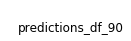

<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/hicky/anaconda3/envs/tsne/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


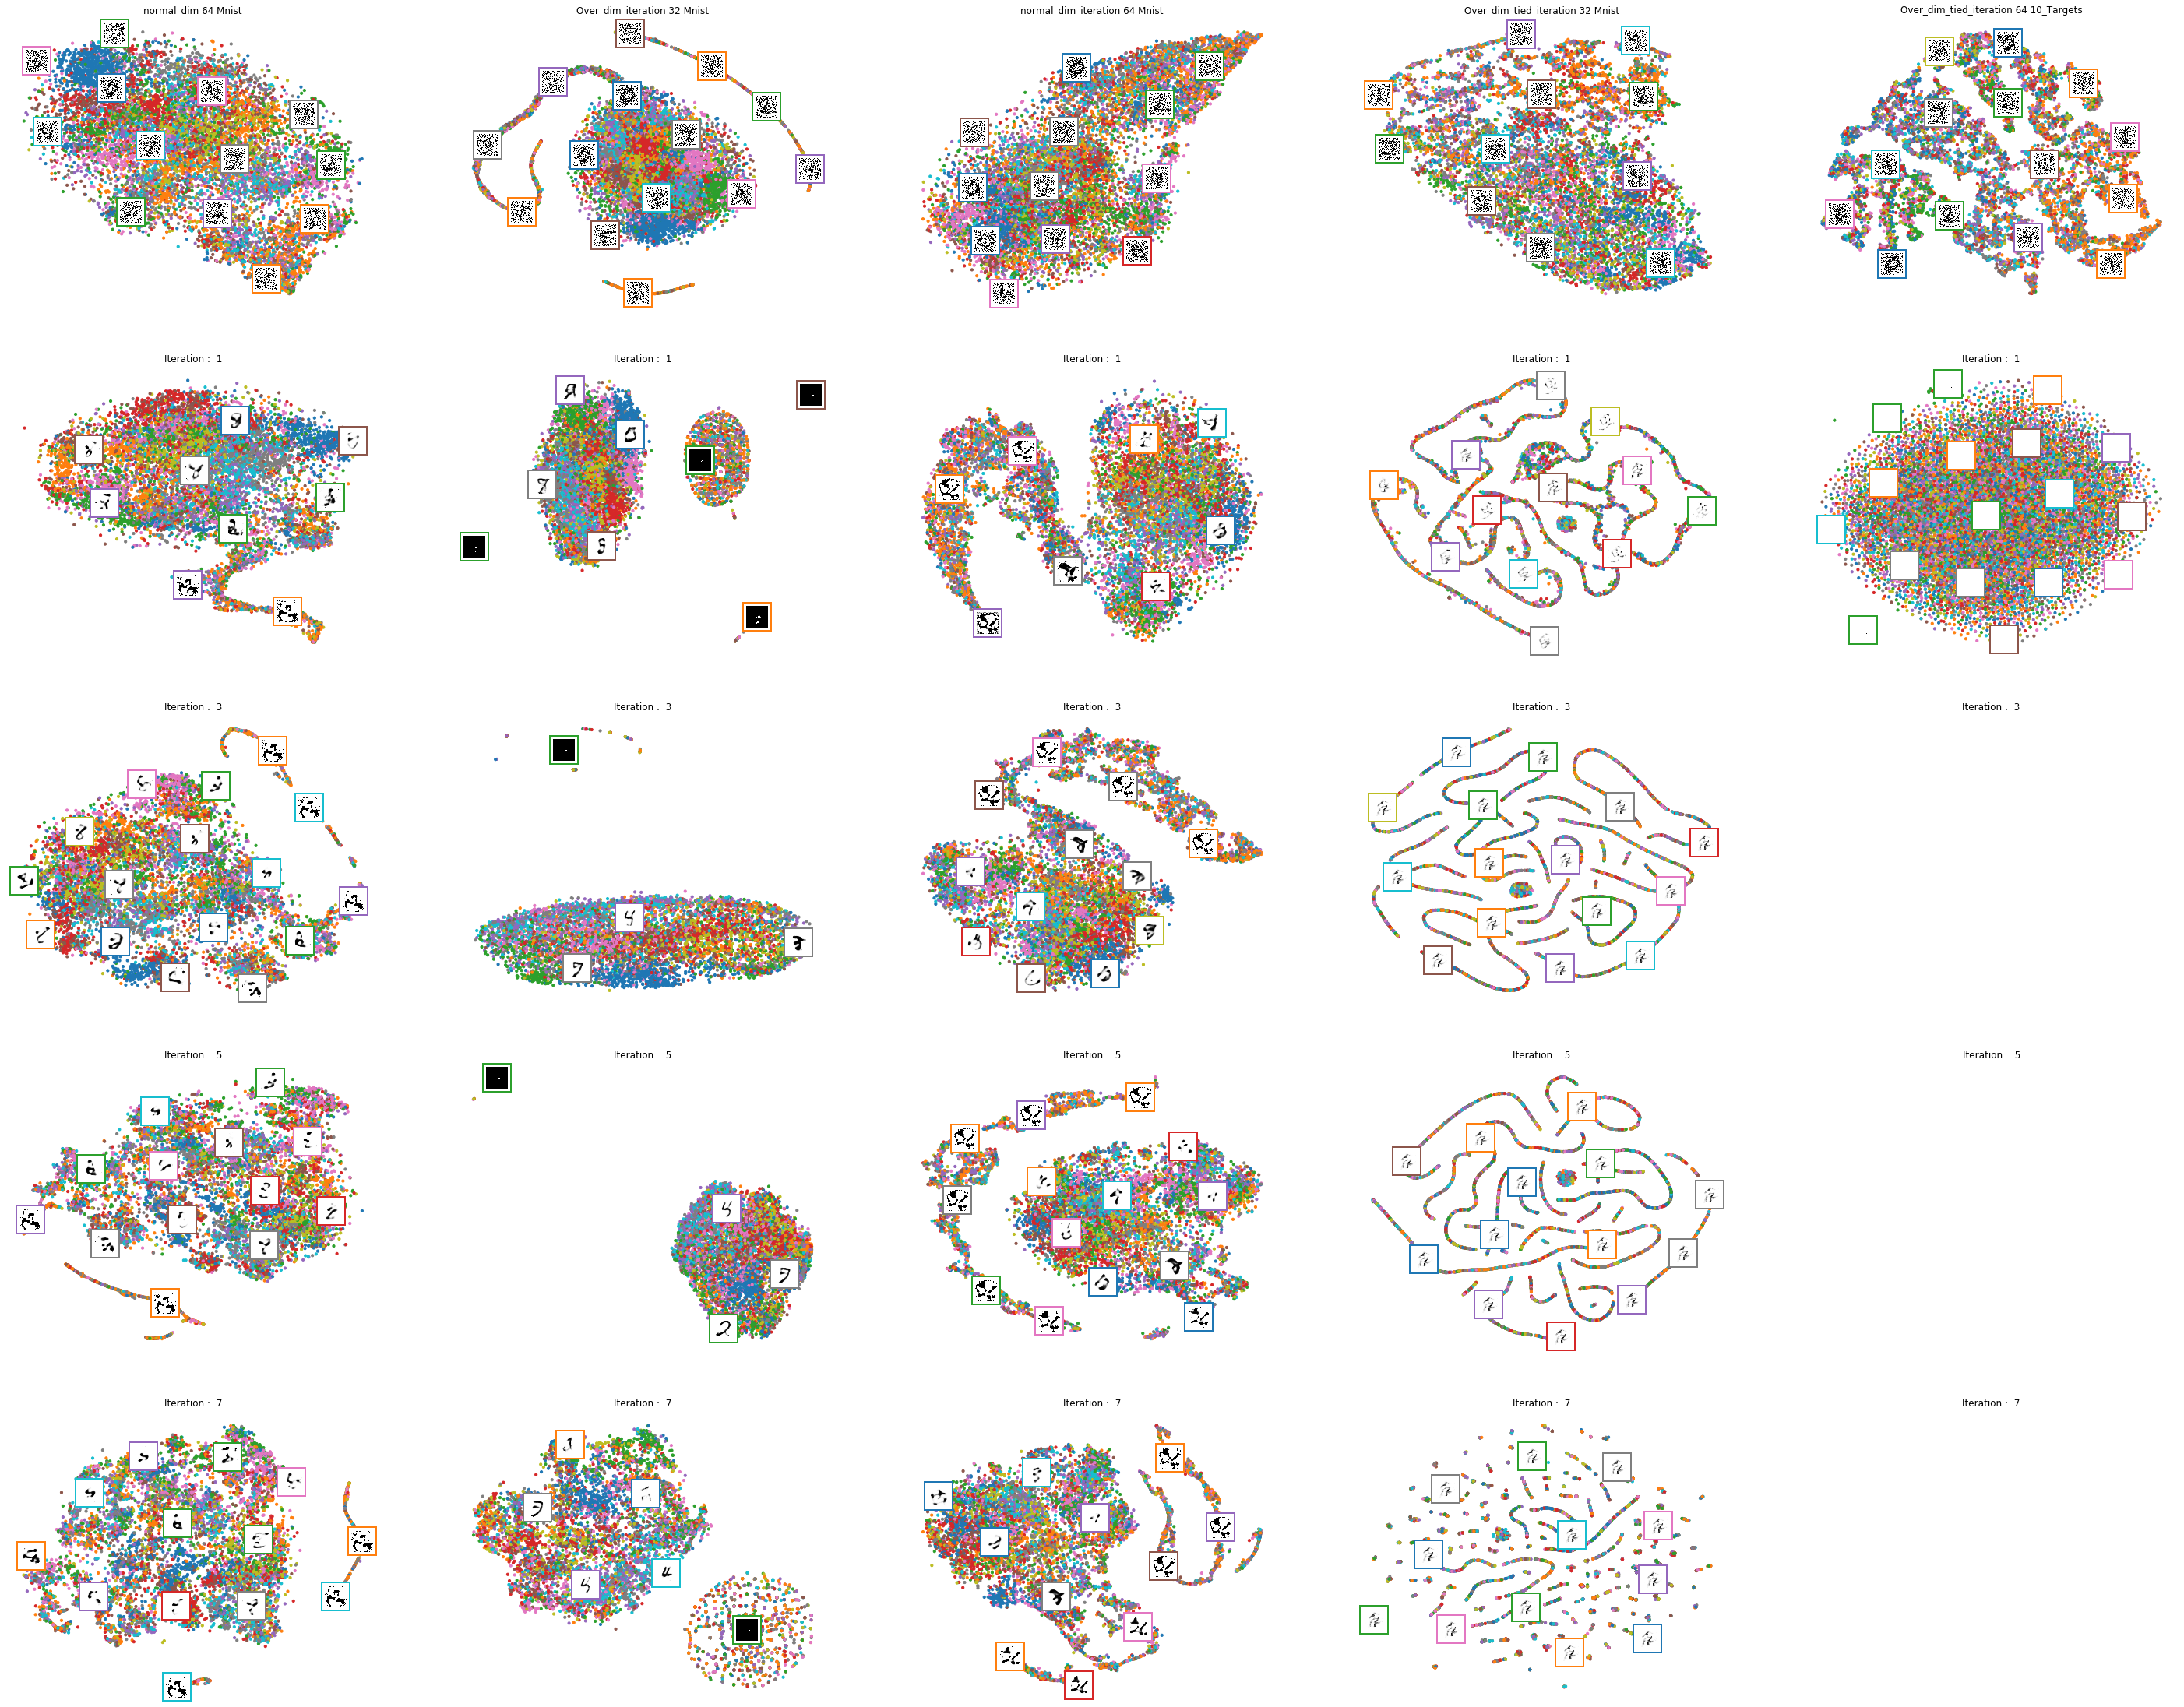

In [10]:
pos_x=len(experiments)
pos_y=6#8#*2

for data in name_list:
######################## Loop over data list
    plt.figure(figsize=(2,0.5))
    plt.text(0.1, 0.1, data, fontsize=12) 
    plt.axis("off")

    plt.show()

    #plt.figure(figsize=(10*pos_x, 8*pos_y))
    plt.figure(figsize=(10*pos_x, 8*pos_y))


    ################# Loop Over experiments
    for n,exp in enumerate(experiments,1):
        
        ###################
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        j=0

        for counter ,compressed in enumerate(zip(predictions['predicted_output_encoder'],predictions['predictions'])): 
            if counter in [0,1,3,5,7]:
                j=j+1
                if not (np.isnan(compressed[0]).any() or np.isinf(compressed[0]).any()):
                    X_valid_2D = tsne.fit_transform(compressed[0])
                    X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
                    X_valid=compressed[1].reshape(10000,28,28)


                    plt.subplot(pos_y,pos_x,n+j*pos_x)#*2)
                    if (counter==0):
                        plt.title(" ".join(str(x) for x in dtf[['autoencoder_type','batch_size','targets_type']].iloc[n-1].values))
                    else :
                        plt.title(" ".join(str(x) for x in ["Iteration : ",counter])) 

                    plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
                    plt.axis("off")


                    #plt.subplot(pos_y,pos_x,n+counter*pos_x*2+pos_x)
                    #plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)

                    image_positions = np.array([[1., 1.]])
                    for index, position in enumerate(X_valid_2D):
                        dist = np.sum((position - image_positions) ** 2, axis=1)
                        if np.min(dist) > 0.04: # if far enough from other images
                            image_positions = np.r_[image_positions, [position]]
                            imagebox = mpl.offsetbox.AnnotationBbox(
                                mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
                                position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
                            plt.gca().add_artist(imagebox)
                    plt.axis("off")



                    X_valid_2D=[]
                    X_valid=[]
        
        pickle_artifact=[]
        predictions=[]
            

##################
    plt.show;


+ Batch size doesn't change the manifold significantly  
+ Training iteration (train the network with predictions) does influence the manifold, mostly rotation and the cluster formation it becomes slightly worse through the iterations. With **Noisy** data iteration (train the network with predictions) appears to change nothing.
+ Tied weights also seem to make the clustering worse.  
+ Over_dim_tied_iteration shows in contrast to Over_dim for **10_Targets** worsening. This is a combination of the worsening in Over_dim_tied and Over_dim_iteration.
+ For **Noisy** data Over_dim and normal_dim don't present a big difference. Although normal dim produces worse reconstructions
+ For **Mnist** data Over_dim_iteration and normal_dim_iteration don't present a big difference. Although normal dim produces worse reconstructions
